In [1]:
import pandas as pd
import numpy as np

data = pd.read_excel("hepatitis_new.xlsx", header=None)
data.drop(0, inplace=True, axis=1)
data.drop(0, inplace=True, axis=0)
data.columns = data.iloc[0]
data.drop(1, inplace=True, axis=0)
data.columns = [c.replace(' ', '_') for c in data.columns]
data = data.replace(to_replace=['no', 'yes'], value=[0, 1])
data.CLASS = data.CLASS.replace(to_replace=['Live', 'Die'], value=[0, 1])
data = data.replace(to_replace=['?'], value=np.nan)
data = data.reset_index()
X_temp = data.drop(columns=['CLASS'])
X_temp

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,NaN,0
1,3,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,NaN,0
2,4,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,NaN,0
3,5,31,0,NaN,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,6,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,200.0,4.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,NaN,242.0,3.3,50.0,1
151,153,44,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.0,142.0,4.3,NaN,1
152,154,61,0,0.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.0,20.0,4.1,NaN,1
153,155,53,1,0.0,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.0,19.0,4.1,48.0,1


In [2]:
X = data.groupby("CLASS").transform(lambda x: x.fillna(x.mean()))
X

,index,Age,Sex,Steroid,Antivirals,Fatique,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Speiders,Ascites,Varices,Bilirubin,Alk_Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,1,0.000000,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.000000,18.0,4.0,66.571429,0
1,3,50,0,0.000000,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.000000,42.0,3.5,66.571429,0
2,4,78,0,1.000000,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.000000,32.0,4.0,66.571429,0
3,5,31,0,0.540984,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.000000,52.0,4.0,80.000000,0
4,6,34,0,1.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,101.313725,200.0,4.0,66.571429,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,152,46,0,1.000000,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7.6,122.375000,242.0,3.3,50.000000,1
151,153,44,0,1.000000,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.9,126.000000,142.0,4.3,66.571429,1
152,154,61,0,0.000000,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.8,75.000000,20.0,4.1,66.571429,1
153,155,53,1,0.000000,1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.5,81.000000,19.0,4.1,48.000000,1


In [3]:
y = data['CLASS'].values
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1], dtype=int64)

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[-1.7209121 , -0.89419175,  2.94745653, ...,  0.30720513,
         0.26151157, -0.90748521],
       [-1.69856259,  0.70257923, -0.33927557, ..., -0.48942799,
         0.26151157, -0.90748521],
       [-1.67621309,  2.93805862, -0.33927557, ...,  0.30720513,
         0.26151157, -0.90748521],
       ...,
       [ 1.67621309,  1.58080328, -0.33927557, ...,  0.46653176,
         0.26151157,  1.10194633],
       [ 1.69856259,  0.94209488,  2.94745653, ...,  0.46653176,
        -0.75812043,  1.10194633],
       [ 1.7209121 ,  0.14370939, -0.33927557, ..., -1.1267345 ,
        -1.08753999,  1.10194633]])

# K-Means Random Centroid 10x

In [5]:
from sklearn.cluster import KMeans

Cluster_center = []
for i in range (1,11):
    kmeans = KMeans(init="random", n_clusters=2, random_state=i*2).fit(X_scaled)
    Cluster_center.append(kmeans.cluster_centers_[0])
    Cluster_center.append(kmeans.cluster_centers_[1])
    print('==> Loop ke',i,'\n',kmeans.cluster_centers_)
#print('==> Cluster Center:\n', Cluster_center)
#Cluster_center

==> Loop ke 1 
 [[ 0.56036311  0.28016073  0.13879455 -0.21413866  0.32750461 -0.69997079
  -0.71765819 -0.43074567 -0.16076615 -0.39504026 -0.4866123  -0.90514252
  -0.71359843 -0.61387485  0.65168889  0.60233502  0.37742484 -0.82364414
  -0.65116602  0.62698978]
 [-0.30819971 -0.1540884  -0.076337    0.11777626 -0.18012753  0.38498393
   0.39471201  0.23691012  0.08842138  0.21727214  0.26763676  0.49782839
   0.39247914  0.33763117 -0.35842889 -0.33128426 -0.20758366  0.45300428
   0.35814131 -0.34484438]]
==> Loop ke 2 
 [[ 0.56036311  0.28016073  0.13879455 -0.21413866  0.32750461 -0.69997079
  -0.71765819 -0.43074567 -0.16076615 -0.39504026 -0.4866123  -0.90514252
  -0.71359843 -0.61387485  0.65168889  0.60233502  0.37742484 -0.82364414
  -0.65116602  0.62698978]
 [-0.30819971 -0.1540884  -0.076337    0.11777626 -0.18012753  0.38498393
   0.39471201  0.23691012  0.08842138  0.21727214  0.26763676  0.49782839
   0.39247914  0.33763117 -0.35842889 -0.33128426 -0.20758366  0.4530042

# Dataset for Hierarchical Clustering

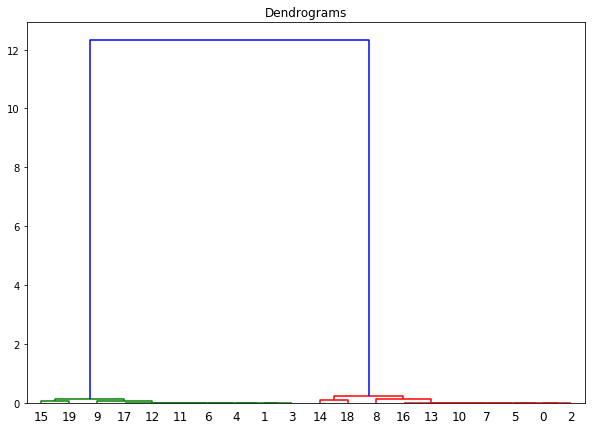

In [6]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Cluster_center, method='ward'))

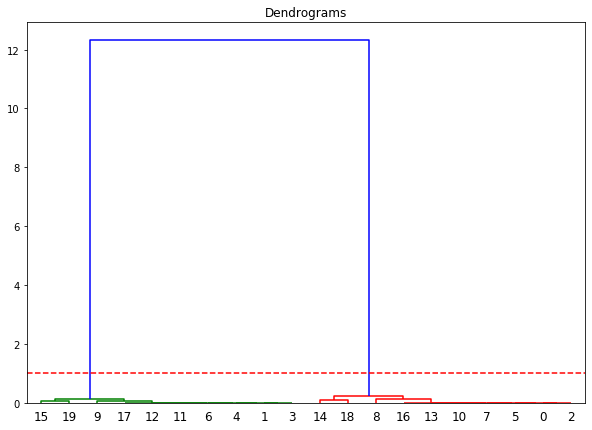

In [8]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Cluster_center, method='ward'))
plt.axhline(y=1, color='r', linestyle='--')

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(Cluster_center) 
cluster
print(cluster.n_clusters_)
print()
print(cluster.labels_)

2

[0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1]


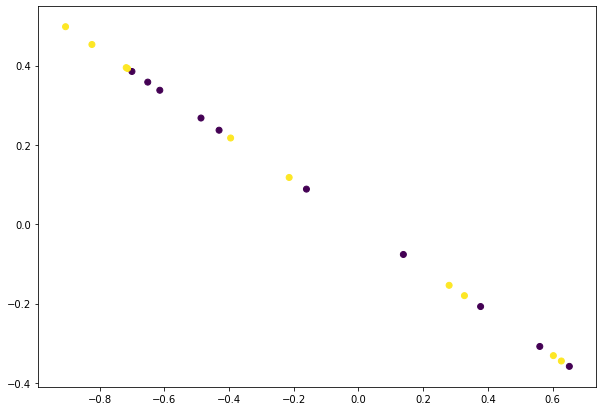

In [10]:
plt.figure(figsize=(10, 7))  
plt.scatter(Cluster_center[0], Cluster_center[4], c=cluster.labels_)

# Hierarchical Clustering - Centroid

# K-Means Clustering - Centroid

In [11]:
kmeans = KMeans(n_clusters=2, random_state=i).fit(Cluster_center)

print(kmeans.cluster_centers_)
kmeans.labels_

[[ 0.56652476  0.28573604  0.14649937 -0.20747346  0.34266922 -0.69982402
  -0.71199092 -0.43437078 -0.16317859 -0.39206989 -0.49043005 -0.90737302
  -0.71786276 -0.61766937  0.65560109  0.59289951  0.37976395 -0.82625723
  -0.64532423  0.63267863]
 [-0.3097843  -0.15631477 -0.08016724  0.11354743 -0.18710447  0.38280409
   0.3894681   0.23744665  0.08915713  0.21441243  0.26810261  0.49617575
   0.39248788  0.33770243 -0.3585674  -0.32445582 -0.20768599  0.45181693
   0.35305676 -0.34599604]]


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1])

# ==> Real data with New Centroid (Clustering)

In [12]:
y_kmeans = kmeans.predict(X_scaled)
print(1-y_kmeans)

print()
print(y)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 1]

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1
 0 0 1 0 0 0 1]


In [13]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, 1-y_kmeans)
acc*100

80.0

# Compare to Hierarchical Clustering

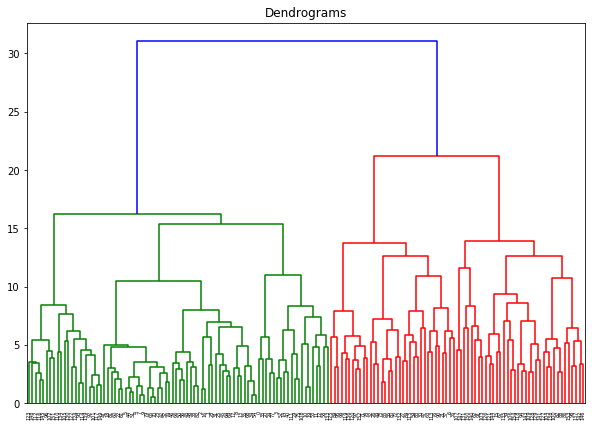

In [14]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

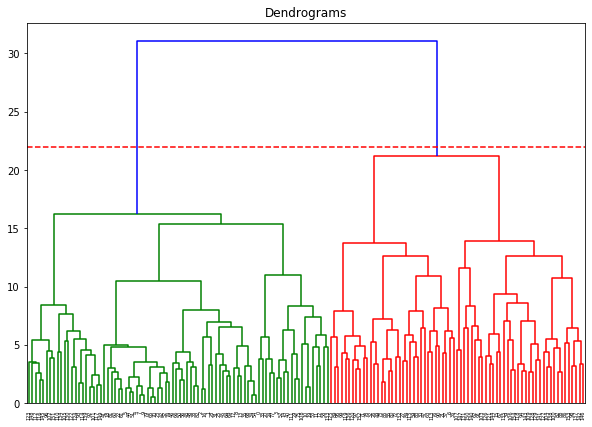

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.axhline(y=22, color='r', linestyle='--')

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward').fit(X_scaled) 
cluster.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0], dtype=int64)

In [17]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, 1-cluster.labels_)
acc*100

69.6774193548387